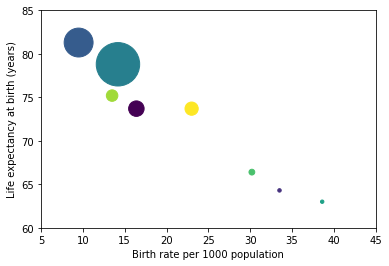

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

countries = ['Brazil', 'Madagascar', 'S. Korea', 'United States', 'Ethiopia', 'Pakistan', 'China', 'Belize']
#Уровень рождаемости на 1000 населения.
birth_rate = [16.4, 33.5, 9.5, 14.2, 38.6, 30.2, 13.5, 23.0]
#Ожидаемая средняя продолжительность жизни при рождении, в г. 
life_expectancy = [73.7, 64.3, 81.3, 78.8, 63.0, 66.4, 75.2, 73.7]
#Доход на душу населения, определенный в 2000 г. в долл. США. 
GDP = np.array([4800, 240, 16700, 37700, 230, 670, 2640, 3490])
fig, ax = plt.subplots()
#Некоторые произвольно выбираемые цвета:
colors = range(len(countries))
ax.scatter(birth_rate, life_expectancy, c=colors , s=GDP/20) 
ax.set_xlim(5, 45)
ax.set_ylim(60, 85)
ax.set_xlabel('Birth rate per 1000 population') 
ax.set_ylabel('Life expectancy at birth (years)')

plt.show()
plt.draw()
fig.savefig("image.png",dpi=500)

offset = 1
for x, y, s, country in zip(birth_rate, life_expectancy, GDP, countries):
    ax.text(x+offset, y, country, va='center')

Reading data from file population_total.tsv
Reading data from file bmi_men.tsv
Reading data from file gdp.tsv
Reading data from file continents.tsv


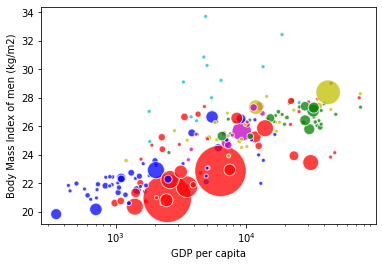

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename, data_type=float):
    print('Reading data from file {}'.format(filename))
    data = {}
    with open(filename, 'r') as fi:
        for line in fi.readlines():
            fields = line.split('\t')
            
            if len(fields) !=2:
                continue
                
            country, value = fields[0], fields[1].strip()
            
            if not value:
                continue
                
            data[country] = data_type(value)
            
    return data

raw_pop = read_data('population_total.tsv')
raw_bmi = read_data('bmi_men.tsv')
raw_gdp = read_data('gdp.tsv')
continent = read_data('continents.tsv', str)

countries = set(raw_pop.keys()) & set(raw_bmi.keys()) & set(raw_gdp.keys()) & set(continent.keys())

countries = sorted(list(countries))

pop = np.array([raw_pop[country] for country in countries])
bmi = np.array([raw_bmi[country] for country in countries])
gdp = np.array([raw_gdp[country] for country in countries])

continent_colors = {'Africa': 'b', 'Asia': 'r', 'North America': 'y',
                    'South America': 'm', 'Europe': 'g', 'Oceania': 'c'}
colors = [continent_colors[continent[country]] for country in countries]

sizes = np.clip(pop / 1.e9 * 2000, 16, None)

fig = plt.figure()
ax = fig.add_subplot(111)
sct = ax.scatter(gdp, bmi, s=sizes, c=colors, edgecolor='w')
sct.set_alpha(0.75)
ax.set_xscale('log')

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Body Mass Index of men (kg/m2)')

plt.show()